# Построение моделей на панельных данных в Python, часть 1: объединенный МНК, модель с фиксированными эффектами, модель со случайными эффектами.

In [ ]:
import pandas as pd
df = pd.DataFrame(pd.read_stata('data_mac_sr.dta'))
df['region']=df.region.apply(lambda x: x.split(' ')[0])
df=df.rename(columns = {'Treated': 'treat'})
df.head(5)

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,urlnum,datein,month,week,day,year,date_src,bmonth,bweek,byear,...,date_start_booking,eurP,lprice100,Post,treat,google_src,town_avail,laglprice100,sample_mac_sr_lag,sample_mac_sr
0,/hotel/fr/a-cheda.en-gb.html,2015-09-01,9,35,1,2015,2015-08-07,8,32,2015,...,2011-07-05,213.017044,536.137218,1,1,64.0,0.535714,536.952174,1.0,1
1,/hotel/fr/a-cheda.en-gb.html,2015-09-01,9,35,1,2015,2015-08-02,8,31,2015,...,2011-07-05,214.760132,536.952174,0,1,57.0,0.535714,572.025274,1.0,1
2,/hotel/fr/a-cheda.en-gb.html,2015-09-01,9,35,1,2015,2015-07-18,7,29,2015,...,2011-07-05,304.981995,572.025274,0,1,60.0,0.535714,571.473817,1.0,0
3,/hotel/fr/a-cheda.en-gb.html,2015-09-01,9,35,1,2015,2015-07-13,7,28,2015,...,2011-07-05,303.304779,571.473817,0,1,66.0,0.500000,581.004779,1.0,1
4,/hotel/fr/a-cheda.en-gb.html,2015-09-01,9,35,1,2015,2015-07-03,7,27,2015,...,2011-07-05,333.635071,581.004779,0,1,62.0,0.571429,581.317328,1.0,0


In [ ]:
df_table=df.merge(df.groupby('urlnum', as_index=False).agg({'date_src':'min'}))
df_table

,urlnum,datein,month,week,day,year,date_src,bmonth,bweek,byear,...,date_start_booking,eurP,lprice100,Post,treat,google_src,town_avail,laglprice100,sample_mac_sr_lag,sample_mac_sr
0,/hotel/fr/a-spelunca.en-gb.html,2015-09-11,9,37,11,2015,2015-07-08,7,27,2015,...,2012-07-06,70.418472,425.445562,0,1,62.0,1.000000,425.401066,1.0,1
1,/hotel/fr/a-spelunca.en-gb.html,2015-09-16,9,37,16,2015,2015-07-08,7,27,2015,...,2012-07-06,70.418472,425.445562,0,1,62.0,1.000000,NaN,NaN,1
2,/hotel/fr/ajaccio-3.en-gb.html,2015-09-01,9,35,1,2015,2015-06-28,6,26,2015,...,2008-07-04,104.380455,464.804245,0,1,59.0,0.884615,465.002252,1.0,0
3,/hotel/fr/alata.en-gb.html,2015-09-01,9,35,1,2015,2015-06-28,6,26,2015,...,2012-07-30,83.222252,442.151476,0,1,59.0,0.500000,442.687892,1.0,0
4,/hotel/fr/albion-ajaccio.en-gb.html,2015-09-05,9,36,5,2015,2015-07-02,7,27,2015,...,2010-05-20,98.731857,459.240766,0,1,62.0,0.653846,457.798507,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,/hotel/it/villino-lucia.en-gb.html,2015-09-01,9,35,1,2015,2015-06-23,6,25,2015,...,2013-07-01,76.697380,433.986755,0,0,90.0,0.700000,NaN,NaN,1
884,/hotel/it/vittorio-emanuele.en-gb.html,2015-09-01,9,35,1,2015,2015-06-23,6,25,2015,...,2007-04-16,59.963409,409.373453,0,0,90.0,0.888889,NaN,NaN,1
885,/hotel/it/xenia-hotel-villasimius.en-gb.html,2015-09-21,9,38,21,2015,2015-07-13,7,28,2015,...,2014-06-27,73.739235,430.053502,0,0,87.0,0.548387,NaN,NaN,1
886,/hotel/it/yacht-birdie.en-gb.html,2015-09-01,9,35,1,2015,2015-06-23,6,25,2015,...,2015-05-16,80.880875,439.297739,0,0,90.0,0.700000,NaN,NaN,1


In [ ]:
df_table=df_table[['region', 'capacity', 
                        'stars', 'rating', 
                        'dchain', 'Nreviewers', 
                        'date_start_booking']].dropna()

In [ ]:
df_table['for_std_counting']=df_table['date_start_booking'].dt.day + df_table['date_start_booking'].dt.month * 30 + df_table['date_start_booking'].dt.year * 365

In [ ]:
import numpy as np

def balance_covariate (df):
    t2=pd.concat([df[df['region']=='Corsica'].describe(datetime_is_numeric=True).round(2)[['capacity', 
                        'stars', 'rating', 
                        'dchain', 'Nreviewers', 
                        'date_start_booking']].loc[['count', 
                        'mean', 'std']].T.rename(columns={'mean': 'mean_Corsica', 
                        'std': 'std_Corsica', 'count': 'obs_Corsica'}).T, 
           df[df['region']=='Sardinia'].describe(datetime_is_numeric=True).round(2)[['capacity', 
                        'stars', 'rating', 
                        'dchain', 'Nreviewers', 
                        'date_start_booking']].loc[['count', 
                        'mean', 'std']].T.rename(columns={'mean': 'mean_Sardinia', 
                                                          'std': 'std_Sardinia',
                                                         'count': 'obs_Sardinina'}).T])
    t2['date_start_booking']=t2['date_start_booking'].apply(
    lambda x: x.strftime('%Y-%m-%d') if type(x) == pd._libs.tslibs.timestamps.Timestamp else x)
    t2=t2.rename(columns={'capacity': 'Number of rooms', 
                   'stars' : 'Star rating',
                  'dchain':'Chain affiliation',
                  'rating' : 'Users\' rating',
                  'Nreviewers' : 'Number of reviewers', 
                  'date_start_booking' : 'On Booking.com since'}).T
    t2['std_Corsica'][-1]=round(np.std(df_table[df_table['region']=='Corsica'].for_std_counting),2)
    t2['std_Sardinia'][-1]=round(np.std(df_table[df_table['region']=='Sardinia'].for_std_counting),2)
    
    t_stat=[]

    for i in range(0, len(t2)):
        try:
            numerator=int(t2['mean_Sardinia'][i])-int(t2['mean_Corsica'][i])
        except ValueError:
            date1=(int(t2['mean_Sardinia'][i].split('-')[0]) * 365 + 
            int(t2['mean_Sardinia'][i].split('-')[1].split('-')[0]) * 30 + int(t2['mean_Sardinia'][i].split('-')[1].split('-')[-1])) 
            date2= (int(t2['mean_Corsica'][i].split('-')[0]) * 365 + 
            int(t2['mean_Corsica'][i].split('-')[1].split('-')[0]) * 30 + int(t2['mean_Corsica'][i].split('-')[1].split('-')[-1]))
            numerator = date1-date2
        denominator=((t2['std_Corsica'][i]**2/t2['obs_Corsica'][i]) + (t2['std_Sardinia'][i]**2/t2['obs_Sardinina'][i]))**(1/2)
        t_stat.append(numerator/denominator)

    t2['t_статистика']=t_stat

    p_value=[]

    for i in range(0, len(t2)):
        if abs(t2['t_статистика'][i]) <= 1.645 :
            p_value.append('***')
        elif abs(t2['t_статистика'][i]) <= 1.96:
            p_value.append('**')
        elif abs(t2['t_статистика'][i]) <= 2.58:
            p_value.append('*')
        else:
            p_value.append(' ')

    t2['значимость']=p_value

    t2=t2.round(2)
    return (t2)
balance_covariate(df_table)

,obs_Corsica,mean_Corsica,std_Corsica,obs_Sardinina,mean_Sardinia,std_Sardinia,t_статистика,значимость
Number of rooms,378.0,28.18,27.97,499.0,38.32,55.01,3.51,
Star rating,378.0,2.21,1.46,499.0,2.32,1.72,0.00,***
Users' rating,378.0,7.99,0.78,499.0,8.32,0.75,19.12,
Chain affiliation,378.0,0.07,0.26,499.0,0.04,0.2,0.00,***
Number of reviewers,378.0,267.91,221.83,499.0,200.96,261.67,-4.10,
On Booking.com since,378,2011-08-29,806.38,499,2011-06-09,874.8,-1.09,***


In [ ]:
df=df.rename(columns={'capacity': 'Number of rooms', 
                   'stars' : 'Star rating',
                  'dchain':'Chain affiliation',
                  'rating' : 'Users\' rating',
                  'Nreviewers' : 'Number of reviewers'})

df=df[['date_src', 'Number of rooms', 'Star rating', 'Chain affiliation',
 'Users\' rating',
       'Number of reviewers',
      'breakfast',
       'freecanc',
       'eurP', 'lprice100', 'panelid1415', 
              'region', 'bdays', 
              'sample_mac_sr', 'hot_size', 'google_src', 'town_avail', 'treat', 'Post']].dropna()
df['Postlaw_Treated']=df['Post']*df['treat']

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.outliers_influence as oi

reg= sm.OLS(df[['lprice100']], df[['Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays']]).fit(cov_type="HC3")
result_table= summary_col(results = reg, stars = True)
print(result_table)


                     lprice100 
-------------------------------
Number of rooms     0.3796***  
                    (0.0061)   
Star rating         13.6565*** 
                    (0.1118)   
Chain affiliation   2.0396***  
                    (0.6428)   
Users' rating       51.1513*** 
                    (0.0514)   
Number of reviewers -0.0430*** 
                    (0.0006)   
breakfast           -20.1175***
                    (0.3055)   
freecanc            2.4034***  
                    (0.2921)   
bdays               0.1873***  
                    (0.0064)   
R-squared           0.9889     
R-squared Adj.      0.9889     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#однонаправленные фиксированные эффекты
from linearmodels.panel import PanelOLS

oneway_fe=df.set_index(["panelid1415", "Postlaw_Treated"])
reg_fe1 = PanelOLS(dependent=oneway_fe['lprice100'],
             exog=oneway_fe[['Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays']],
             entity_effects=True,
             time_effects=False,
                  drop_absorbed=True)
reg_fe1=reg_fe1.fit(cov_type='clustered', cluster_entity=True)
reg_fe1

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1831: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Number of rooms, Star rating, Chain affiliation, Number of reviewers, breakfast, freecanc

  warnings.warn(


Dep. Variable:,lprice100,R-squared:,0.0003
Estimator:,PanelOLS,R-squared (Between):,0.0755
No. Observations:,121245,R-squared (Within):,0.0003
Date:,"Sun, Jan 15 2023",R-squared (Overall):,0.0755
Time:,18:15:09,Log-likelihood,-4.564e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,16.017
Entities:,20353,P-value,0.0000
Avg Obs:,5.9571,Distribution:,"F(2,100890)"
Min Obs:,1.0000,,
Max Obs:,13.000,F-statistic (robust):,6.0452


In [ ]:
#однонаправленные фиксированные моменты времени
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

reg= sm.OLS(df[['lprice100']], 
            df[['Post', 'Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays']]).fit(cov_type="HC3")
result_table= summary_col(results = reg, stars = True)
print(result_table)


                     lprice100 
-------------------------------
Post                7.9004***  
                    (0.4297)   
Number of rooms     0.3754***  
                    (0.0061)   
Star rating         13.6460*** 
                    (0.1117)   
Chain affiliation   2.2568***  
                    (0.6471)   
Users' rating       50.0038*** 
                    (0.0812)   
Number of reviewers -0.0429*** 
                    (0.0006)   
breakfast           -19.8334***
                    (0.3060)   
freecanc            1.9710***  
                    (0.2923)   
bdays               0.3229***  
                    (0.0098)   
R-squared           0.9890     
R-squared Adj.      0.9890     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#двунаправленная модель с фиксированными эффектами

twoway_fe=df.set_index(["panelid1415", "Postlaw_Treated"])
reg_fe2 = PanelOLS(dependent=twoway_fe['lprice100'],
             exog=twoway_fe[['Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays']],
             entity_effects=True,
             time_effects=True,
                  drop_absorbed=True)
reg_fe2=reg_fe2.fit(cov_type='clustered', cluster_entity=True)
reg_fe2

/Users/olgakalinina/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1831: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Number of rooms, Star rating, Chain affiliation, Number of reviewers, breakfast, freecanc

  warnings.warn(


Dep. Variable:,lprice100,R-squared:,0.0010
Estimator:,PanelOLS,R-squared (Between):,0.0847
No. Observations:,121245,R-squared (Within):,-0.0007
Date:,"Sun, Jan 15 2023",R-squared (Overall):,0.0848
Time:,18:15:09,Log-likelihood,-4.562e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,49.950
Entities:,20353,P-value,0.0000
Avg Obs:,5.9571,Distribution:,"F(2,100889)"
Min Obs:,1.0000,,
Max Obs:,13.000,F-statistic (robust):,16.376


In [ ]:
#случайные эффекты
from linearmodels import RandomEffects
re_df=df.set_index(["panelid1415", "Postlaw_Treated"])
re=RandomEffects(dependent=re_df['lprice100'],
             exog=re_df[['Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays']])
re=re.fit(cov_type='clustered', cluster_entity=True)
re

Dep. Variable:,lprice100,R-squared:,0.9331
Estimator:,RandomEffects,R-squared (Between):,0.9887
No. Observations:,121245,R-squared (Within):,-0.1409
Date:,"Sun, Jan 15 2023",R-squared (Overall):,0.9883
Time:,18:15:10,Log-likelihood,-4.75e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,2.113e+05
Entities:,20353,P-value,0.0000
Avg Obs:,5.9571,Distribution:,"F(8,121237)"
Min Obs:,1.0000,,
Max Obs:,13.000,F-statistic (robust):,2.223e+05


In [ ]:
#сортирую датафрейм, чтобы разделить на две последовательные части - часть, которая treated, и другая 
df_for_chow=df.drop(columns=['panelid1415', 'region', 'date_src'])
df_for_chow=df_for_chow.sort_values(by='treat', ascending=True).reset_index().drop(columns=['index'])
for i in range (0, len(df_for_chow)):
    if df_for_chow['treat'][i]==1.0:
        break_point = i
        break

In [ ]:
def linear_residuals(X, y):
    
    import pandas as pd
    import numpy as np
    
    from sklearn.linear_model import LinearRegression as lr
    
    #строим линейную модель
    model = lr().fit(X, y)
    
    # строим датафрейм с предсказанными значениями целевой метрики 
    summary_result = pd.DataFrame(columns = ['y_hat'])
    yhat_list = [float(i[0]) for i in np.ndarray.tolist(model.predict(X))]
    summary_result['y_hat'] = yhat_list  
    # добавляем к датафрейму реальные значения целевой метрики
    summary_result['y_actual'] = y.values
    # вычисляем остатки
    summary_result['residuals'] = summary_result.y_actual - summary_result.y_hat
    # возводим остатки в квадрат
    summary_result['residuals_sq'] = summary_result.residuals ** 2
    
    return(summary_result)


# пишем функцию, которая считает сумму квадратов остатков 
def calculate_RSS(X, y):
   
    resid_data = linear_residuals(X, y)
    rss = resid_data.residuals_sq.sum()
    return(rss)

def ChowTest(X, y, last_index_in_model_1, first_index_in_model_2):
    
    rss_pooled = calculate_RSS(X, y)
    
# делим выборку на две подвыборке, в которой есть “слом”, наличие которого мы хотим проверить, и в котором слома нет
    X1 = X.loc[:last_index_in_model_1]
    y1 = y.loc[:last_index_in_model_1]
    rss1 = calculate_RSS(X1, y1)
    
    X2 = X.loc[first_index_in_model_2:]
    y2 = y.loc[first_index_in_model_2:]
    rss2 = calculate_RSS(X2, y2)
    
    # находим кол-во регрессоров + 1 для константы
    k = X.shape[1] + 1
    # находим кол-во наблюдений до слома
    N1 = X1.shape[0]
    # находим кол-во наблюдений после слома
    N2 = X2.shape[0]

    # вычисляем числитель для статистики Чоу
    numerator = (rss_pooled - (rss1 + rss2)) / k
    # вычисляем знаменатель для статистики Чоу
    denominator = (rss1 + rss2) / (N1 + N2 - 2 * k)
    
    # вычисляем статистику Чоу
    Chow_Stat = numerator / denominator
    
    # статистика Чоу имеет распределение Фишера с k и N1 + N2 - 2k степенями свободы
    from scipy.stats import f
    
    # считаем p-value
    p_value = 1 - f.cdf(Chow_Stat, dfn = 5, dfd = (N1 + N2 - 2 * k))
    result = (Chow_Stat, p_value)
    return(result)

ChowTest(y=df_for_chow[['lprice100']], X=df_for_chow[['Number of rooms', 
        'Star rating',
        'Chain affiliation',
        'Users\' rating',
        'Number of reviewers',
        'breakfast',
       'freecanc', 'bdays','treat']],
         last_index_in_model_1=break_point-1,
         first_index_in_model_2=break_point)[1]

#p-value = 0 => на 1%-ном уровне значимости отвергаю гипотезу Н0 о том, что коэффициент при сломе равен 0
#делаем выбор в пользу модели с фиксированными эффектами 

1.1102230246251565e-16

In [ ]:
import numpy.linalg as la
from scipy import stats


def hausman(fe, re, changed_covariates):
    
    #вычленяем коэффициенты при переменных
    b = fe.params
    B = re.params.loc[changed_covariates]
    
    #находим ковариационную матрицу
    v_b = fe.cov
    v_B = re.cov[changed_covariates].loc[changed_covariates]
    
    #находим кол-во степеней свободы
    df = b.size
    
    #рассчитываем тестовую статистику
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    
    #находим p-value
    pval = stats.chi2.sf(chi2, df)

    return round(chi2, 2), pval

In [ ]:
hausman(reg_fe2, re, ['Users\' rating', 'bdays'])

(5028.29, 0.0)

In [ ]:
hausman(reg_fe1, re, ['Users\' rating', 'bdays'])

(4862.71, 0.0)

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['p-value']

test_result = sms.het_breuschpagan(reg.resid, reg.model.exog)

print('p-value теста Бреуша-Пагана: ' + str(test_result[1]))

p-value теста Бреуша-Пагана: 0.0


# Построение моделей на панельных данных в Python, часть 2: метод “разность разностей” (diff-in-diff).

In [ ]:
import datetime

df['week_number']=df['date_src'].apply(lambda x: x.isocalendar()[1])
df

,date_src,Number of rooms,Star rating,Chain affiliation,Users' rating,Number of reviewers,breakfast,freecanc,eurP,lprice100,...,region,bdays,sample_mac_sr,hot_size,google_src,town_avail,treat,Post,Postlaw_Treated,week_number
0,2015-08-07,18,4,0,8.8,206.0,0,0,213.017044,536.137218,...,Corsica,25,1,0,64.0,0.535714,1,1,1,32
1,2015-08-02,18,4,0,8.8,206.0,0,0,214.760132,536.952174,...,Corsica,30,1,0,57.0,0.535714,1,0,0,31
2,2015-07-18,18,4,0,8.8,206.0,0,0,304.981995,572.025274,...,Corsica,45,0,0,60.0,0.535714,1,0,0,29
3,2015-07-13,18,4,0,8.8,206.0,0,0,303.304779,571.473817,...,Corsica,50,1,0,66.0,0.500000,1,0,0,29
4,2015-07-03,18,4,0,8.7,206.0,0,0,333.635071,581.004779,...,Corsica,60,0,0,62.0,0.571429,1,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122391,2015-08-02,6,0,0,8.8,415.0,1,0,71.112625,426.426489,...,Sardinia,65,1,0,98.0,0.775000,0,0,0,31
122392,2015-07-29,6,0,0,8.8,415.0,1,0,88.925400,448.779781,...,Sardinia,70,1,0,92.0,0.725000,0,0,0,31
122393,2015-08-05,6,0,0,8.8,415.0,1,0,69.929970,424.749431,...,Sardinia,65,1,0,98.0,0.125000,0,0,0,32
122394,2015-08-01,6,0,0,8.8,415.0,1,0,69.613747,424.296206,...,Sardinia,70,1,0,98.0,0.650000,0,0,0,31


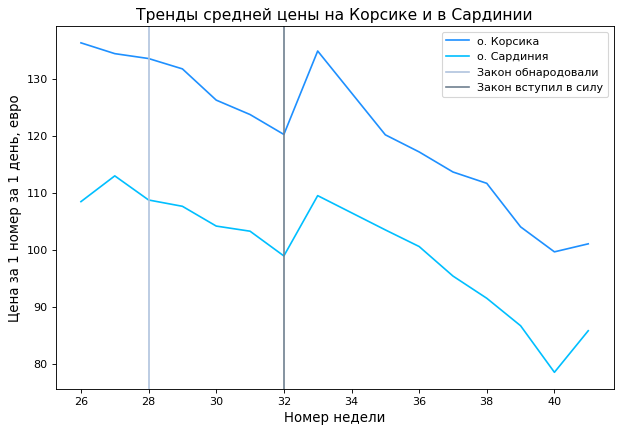

In [ ]:
import matplotlib.pyplot as plt

trends= df.groupby(['week_number', 'region'], as_index=False).agg({'eurP': 'mean'})
trends['region'] = trends['region'].apply(lambda x: 1 if x == 'Corsica' else 0)

fig, axes = plt.subplots(figsize=(9,6), dpi=80)

plt.plot(trends[trends['region'] == 1]['week_number'], trends[trends['region'] == 1]['eurP'], label = 'о. Корсика', color = 'dodgerblue')
plt.plot(trends[trends['region'] == 0]['week_number'], trends[trends['region'] == 0]['eurP'], label = 'о. Сардиния', color = 'deepskyblue')
plt.axvline(x = 28, color = 'lightsteelblue', label = "Закон обнародовали")
plt.axvline(x = 32, color = 'slategrey', label = "Закон вступил в силу")
plt.legend()
plt.xlabel('Номер недели', fontsize=12)
plt.ylabel('Цена за 1 номер за 1 день, евро', fontsize=12)
plt.title('Тренды средней цены на Корсике и в Сардинии', fontsize=14)
plt.show()

In [ ]:
def adding_dummies(df, col_names):
    for column_name in col_names:
        dummies =pd.DataFrame(pd.get_dummies(df[column_name], 
                         prefix=column_name))
        df=df.merge(dummies, left_index=True, right_index=True)
    return(df)
df=adding_dummies(df, ['Star rating', 'Chain affiliation', 'hot_size', 'region'])
df

,date_src,Number of rooms,Star rating,Chain affiliation,Users' rating,Number of reviewers,breakfast,freecanc,eurP,lprice100,...,Star rating_3,Star rating_4,Star rating_5,Chain affiliation_0,Chain affiliation_1,hot_size_0,hot_size_1,hot_size_2,region_Corsica,region_Sardinia
0,2015-08-07,18,4,0,8.8,206.0,0,0,213.017044,536.137218,...,0,1,0,1,0,1,0,0,1,0
1,2015-08-02,18,4,0,8.8,206.0,0,0,214.760132,536.952174,...,0,1,0,1,0,1,0,0,1,0
2,2015-07-18,18,4,0,8.8,206.0,0,0,304.981995,572.025274,...,0,1,0,1,0,1,0,0,1,0
3,2015-07-13,18,4,0,8.8,206.0,0,0,303.304779,571.473817,...,0,1,0,1,0,1,0,0,1,0
4,2015-07-03,18,4,0,8.7,206.0,0,0,333.635071,581.004779,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122391,2015-08-02,6,0,0,8.8,415.0,1,0,71.112625,426.426489,...,0,0,0,1,0,1,0,0,0,1
122392,2015-07-29,6,0,0,8.8,415.0,1,0,88.925400,448.779781,...,0,0,0,1,0,1,0,0,0,1
122393,2015-08-05,6,0,0,8.8,415.0,1,0,69.929970,424.749431,...,0,0,0,1,0,1,0,0,0,1
122394,2015-08-01,6,0,0,8.8,415.0,1,0,69.613747,424.296206,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
df=df.rename(columns={'google_src': 'Google_Searchers', 
                                   'town_avail': 'Hotel_availability'})
df

,date_src,Number of rooms,Star rating,Chain affiliation,Users' rating,Number of reviewers,breakfast,freecanc,eurP,lprice100,...,Star rating_3,Star rating_4,Star rating_5,Chain affiliation_0,Chain affiliation_1,hot_size_0,hot_size_1,hot_size_2,region_Corsica,region_Sardinia
0,2015-08-07,18,4,0,8.8,206.0,0,0,213.017044,536.137218,...,0,1,0,1,0,1,0,0,1,0
1,2015-08-02,18,4,0,8.8,206.0,0,0,214.760132,536.952174,...,0,1,0,1,0,1,0,0,1,0
2,2015-07-18,18,4,0,8.8,206.0,0,0,304.981995,572.025274,...,0,1,0,1,0,1,0,0,1,0
3,2015-07-13,18,4,0,8.8,206.0,0,0,303.304779,571.473817,...,0,1,0,1,0,1,0,0,1,0
4,2015-07-03,18,4,0,8.7,206.0,0,0,333.635071,581.004779,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122391,2015-08-02,6,0,0,8.8,415.0,1,0,71.112625,426.426489,...,0,0,0,1,0,1,0,0,0,1
122392,2015-07-29,6,0,0,8.8,415.0,1,0,88.925400,448.779781,...,0,0,0,1,0,1,0,0,0,1
122393,2015-08-05,6,0,0,8.8,415.0,1,0,69.929970,424.749431,...,0,0,0,1,0,1,0,0,0,1
122394,2015-08-01,6,0,0,8.8,415.0,1,0,69.613747,424.296206,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
df['Postlaw_Treated']=df['Post']*df['treat']
df['PostLaw_Treated_NoChain']= df['Post']*df['treat']*df['Chain affiliation_0']
df['PostLaw_Treated_Chain']= df['Post']*df['treat']*df['Chain affiliation_1']
df['PostLaw_Treated_0stars']= df['Post']*df['treat']*df['Star rating_0']
df['PostLaw_Treated_1stars']= df['Post']*df['treat']*df['Star rating_1']
df['PostLaw_Treated_2stars']= df['Post']*df['treat']*df['Star rating_2']
df['PostLaw_Treated_3stars']= df['Post']*df['treat']*df['Star rating_3']
df['PostLaw_Treated_4stars']= df['Post']*df['treat']*df['Star rating_4']
df['PostLaw_Treated_5stars']= df['Post']*df['treat']*df['Star rating_5']
df['PostLaw_Treated_small_size']= df['Post']*df['treat']*df['hot_size_0']
df['PostLaw_Treated_medium_size']= df['Post']*df['treat']*df['hot_size_1']
df['PostLaw_Treated_large_size']= df['Post']*df['treat']*df['hot_size_2']
df['DaysCorsica']= df['bdays']*df['region_Corsica']
df['DaysSardinia']= df['bdays']*df['region_Sardinia']
df['const']=1

In [ ]:
from linearmodels import IV2SLS
from collections import OrderedDict
from linearmodels.iv.results import compare

mod11v='lprice100 ~  Postlaw_Treated + DaysCorsica  + DaysSardinia  + Google_Searchers + Hotel_availability - 1'
reg11v = IV2SLS.from_formula(mod11v,df).fit(cov_type="robust")
mod22v='lprice100 ~ PostLaw_Treated_NoChain + PostLaw_Treated_Chain + DaysCorsica  + DaysSardinia  + Google_Searchers + Hotel_availability - 1'
reg22v = IV2SLS.from_formula(mod22v,df).fit(cov_type="robust")
mod33v='lprice100 ~  PostLaw_Treated_0stars + PostLaw_Treated_1stars + PostLaw_Treated_2stars + PostLaw_Treated_3stars + PostLaw_Treated_4stars + PostLaw_Treated_5stars + DaysCorsica  + DaysSardinia  + Google_Searchers + Hotel_availability -1'
reg33v = IV2SLS.from_formula(mod33v,df).fit(cov_type="robust")
mod44v='lprice100 ~  PostLaw_Treated_small_size  + PostLaw_Treated_medium_size + PostLaw_Treated_large_size + DaysCorsica  + DaysSardinia  + Google_Searchers + Hotel_availability - 1'
reg44v = IV2SLS.from_formula(mod44v,df).fit(cov_type="robust")

res1v = OrderedDict()
res1v["D-in-D"] = reg11v
res1v["Triple_Chains"] = reg22v
res1v["Triple_Stars"] = reg33v
res1v["Triple_Size"] = reg44v
result = compare(res1v, stars=True, precision='std_errors')
print(result)

                                 Model Comparison                                 
                                    D-in-D Triple_Chains Triple_Stars  Triple_Size
----------------------------------------------------------------------------------
Dep. Variable                    lprice100     lprice100    lprice100    lprice100
Estimator                              OLS           OLS          OLS          OLS
No. Observations                    121245        121245       121245       121245
Cov. Est.                           robust        robust       robust       robust
R-squared                           0.9457        0.9459       0.9477       0.9461
Adj. R-squared                      0.9457        0.9459       0.9477       0.9461
F-statistic                       2.32e+06     2.348e+06     2.48e+06    2.382e+06
P-value (F-stat)                    0.0000        0.0000       0.0000       0.0000
============================= ============  ============ ============ ============
Days